In [1]:
import predictor_of_investment_helper_methods as hm
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
case = "IEEE118_mod1"
df_all = pd.read_csv(f"Z.Figures/Predictors/predictors_{case}.csv",index_col= 0)

In [3]:
df_all

,CM,nbc,Cost dev,Total dev curt,Total dev util,Total dev line flows,Total System Cost,Generation Investment Cost,Network Investment Cost,Generation Operation Cost,Consumption Operation Cost,Emission Cost,Reliability Cost
0,R&D,20,0.009080,0.305682,0.054246,0.656307,4758.323651,0.0,0.0,267.599714,0.0,162.836182,4327.887755
1,R&D,50,0.004354,0.276053,0.047327,0.590071,611.162565,0.0,0.0,8.087037,0.0,0.561772,618.687830
2,R&D,100,0.000293,0.246871,0.043044,0.564467,1484.397799,0.0,0.0,68.699978,0.0,43.034632,1372.663188
3,R&D,200,0.009080,0.228951,0.039394,0.535850,689.025011,0.0,0.0,15.243627,0.0,9.427595,664.353788
4,CHI,20,0.046629,0.488356,0.046850,0.622388,6014.015159,0.0,0.0,265.215236,0.0,150.951500,5597.848424
5,CHI,50,0.002954,0.392501,0.046326,0.572305,5340.025763,0.0,0.0,194.156759,0.0,105.542446,5040.326558
6,CHI,100,0.000293,0.393864,0.039910,0.520059,3019.699887,0.0,0.0,110.432023,0.0,60.634090,2848.633774
7,CHI,200,0.000675,0.379299,0.040297,0.487630,1900.729931,0.0,0.0,55.675175,0.0,32.130001,1812.924755
8,OPT_LB,20,0.065738,0.808447,0.069360,0.888218,5661.300615,0.0,0.0,638.122513,0.0,380.853156,4642.324946
9,OPT_LB,50,0.060509,0.526473,0.059598,0.728204,4036.046826,0.0,0.0,508.895928,0.0,307.151140,3219.999758


In [4]:
df = df_all[df_all["Cost dev"] <= 20000]

<Axes: xlabel='nbc', ylabel='Total dev curt'>

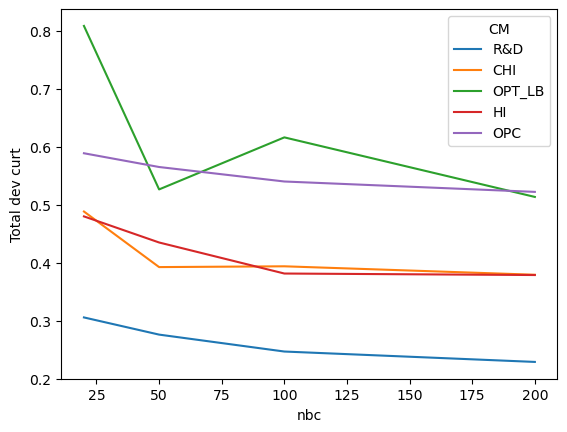

In [5]:
sns.lineplot(data = df,x = "nbc", y="Total dev curt",hue="CM")

<Axes: xlabel='nbc', ylabel='Total dev util'>

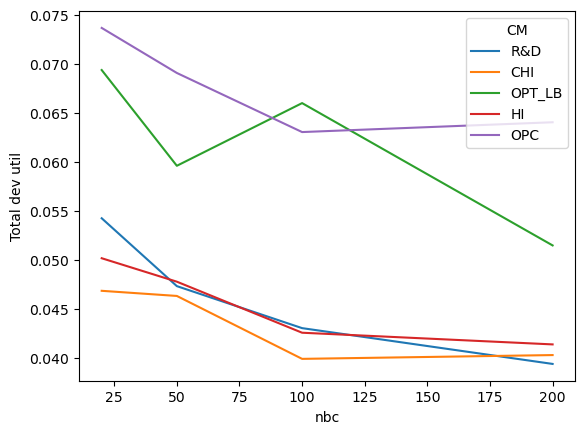

In [6]:
sns.lineplot(data = df,x = "nbc", y="Total dev util",hue="CM")

<Axes: xlabel='nbc', ylabel='Total dev line flows'>

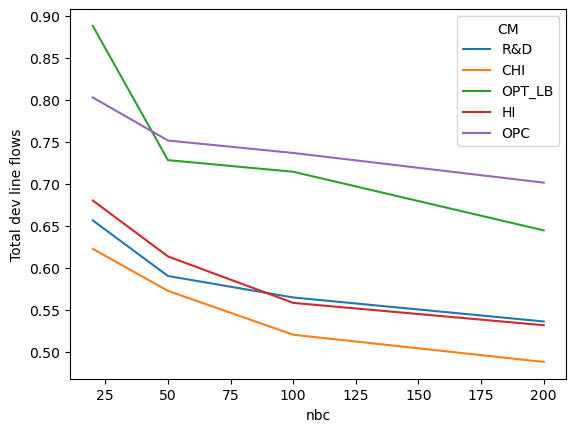

In [7]:
sns.lineplot(data = df,x = "nbc", y="Total dev line flows",hue="CM")

<Axes: xlabel='Total dev util', ylabel='Cost dev'>

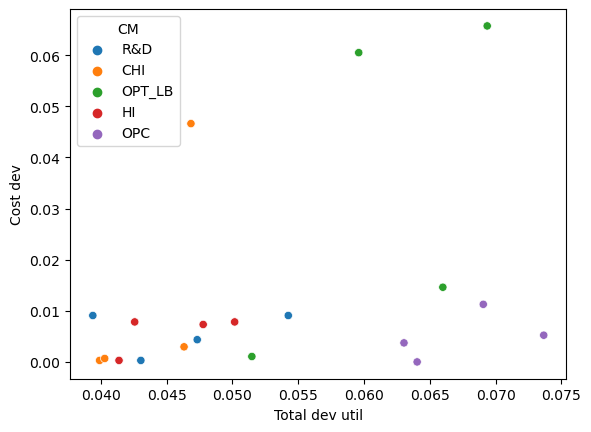

In [8]:
sns.scatterplot(data = df,y = "Cost dev", x="Total dev util",hue="CM")

<Axes: xlabel='Total dev line flows', ylabel='Cost dev'>

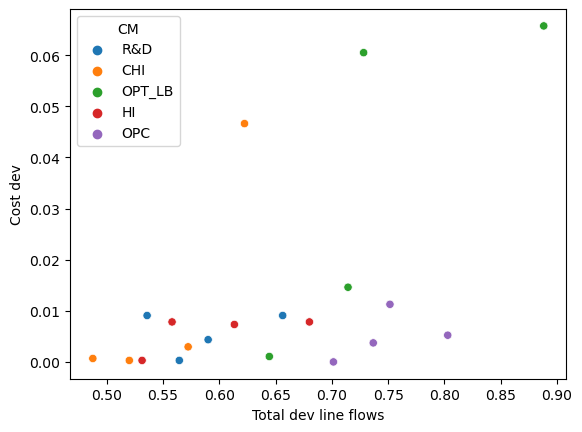

In [9]:
sns.scatterplot(data = df,y = "Cost dev", x="Total dev line flows",hue="CM")

<Axes: xlabel='Generation  Operation Cost', ylabel='Cost dev'>

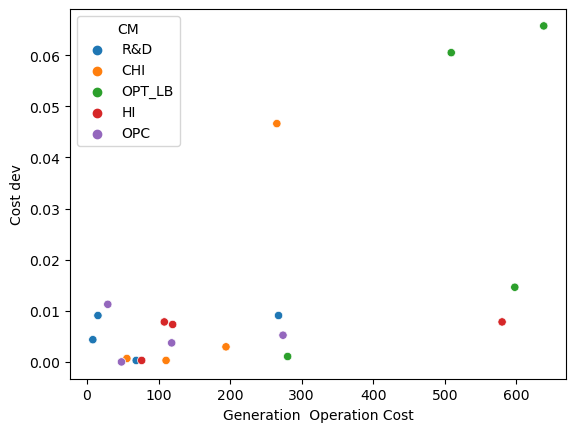

In [10]:
sns.scatterplot(data = df,y = "Cost dev", x="Generation  Operation Cost",hue="CM")

# Aggregated metric

In [11]:
df.columns

Index(['CM', 'nbc', 'Cost dev', 'Total dev curt', 'Total dev util',
       'Total dev line flows', 'Total          System Cost',
       'Generation Investment Cost', 'Network    Investment Cost',
       'Generation  Operation Cost', 'Consumption Operation Cost',
       'Emission              Cost', 'Reliability           Cost'],
      dtype='object')

In [13]:
df_normalized_vals = pd.DataFrame()

col_name = "Total dev curt"
considered_metrics = ["Total dev curt","Total dev util","Generation  Operation Cost"]
for col_name in considered_metrics:
    col = df[col_name]
    normalized_col = (col - np.min(col)) /(np.max(col) - np.min(col))

    df_normalized_vals[col_name] = normalized_col

df_normalized_vals["Sum"] = df_normalized_vals.sum(axis=1) 

df_normalized_vals["Cost dev"] = df["Cost dev"]
df_normalized_vals["CM"] = df["CM"]
df_normalized_vals["nbc"] = df["nbc"]

#df_normalized_vals =df_normalized_vals[df_normalized_vals["Cost dev"] > 0.00005]

<Axes: xlabel='Sum', ylabel='Cost dev'>

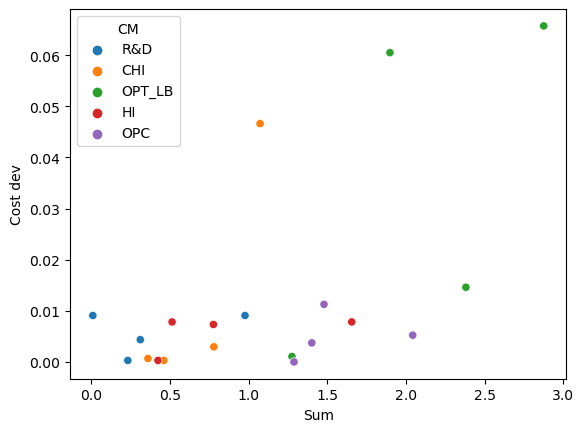

In [14]:
sns.scatterplot(data = df_normalized_vals,y = "Cost dev", x="Sum",hue="CM")

<Axes: xlabel='nbc', ylabel='Sum'>

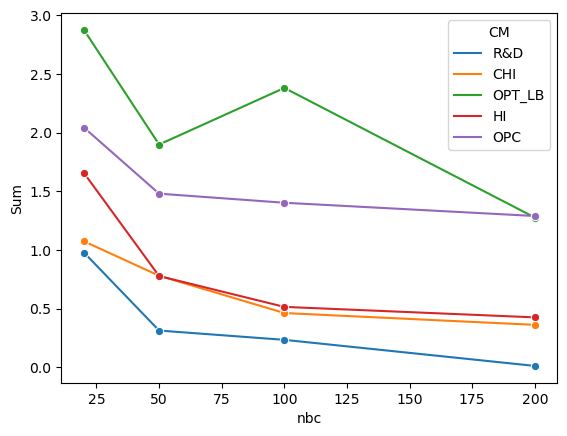

In [15]:
sns.lineplot(data = df_normalized_vals,y = "Sum", x="nbc",hue="CM",marker= "o")